In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
reviews = []
with open('../data/raw/yelp_academic_dataset_review.json', 'r') as f:
    for i, line in enumerate(f):
        if i >= 50000:
            break
        reviews.append(json.loads(line))

df_reviews = pd.DataFrame(reviews)
print(f"Loaded {len(df_reviews):,} reviews")
print(f"Columns: {df_reviews.columns.tolist()}")
df_reviews.head()

Loaded 50,000 reviews
Columns: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


=== REVIEW STATISTICS ===

Date range: 2005-03-01 17:47:15 to 2018-10-04 18:22:35

Star rating distribution:
stars
1.0     5379
2.0     4003
3.0     5677
4.0    12721
5.0    22220
Name: count, dtype: int64


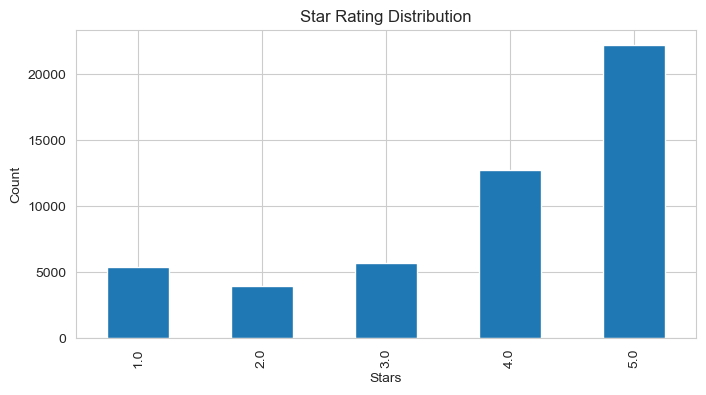


Review text length stats:
count    50000.000000
mean       546.992180
std        499.267814
min          3.000000
25%        225.000000
50%        393.000000
75%        693.000000
max       4997.000000
Name: text_length, dtype: float64


In [3]:
# Analyze review patterns
print("=== REVIEW STATISTICS ===\n")
print(f"Date range: {df_reviews['date'].min()} to {df_reviews['date'].max()}")
print(f"\nStar rating distribution:")
print(df_reviews['stars'].value_counts().sort_index())

# Plot star distribution
plt.figure(figsize=(8, 4))
df_reviews['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Star Rating Distribution')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

# Review length
df_reviews['text_length'] = df_reviews['text'].str.len()
print(f"\nReview text length stats:")
print(df_reviews['text_length'].describe())

In [4]:
# Load first 100,000 users
users = []
with open('../data/raw/yelp_academic_dataset_user.json', 'r') as f:
    for i, line in enumerate(f):
        if i >= 100000:
            break
        users.append(json.loads(line))

df_users = pd.DataFrame(users)
print(f"Loaded {len(df_users):,} users")
print(f"Columns: {df_users.columns.tolist()}")
df_users.head()

Loaded 100,000 users
Columns: ['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


=== USER REVIEW COUNT ANALYSIS ===

count    100000.000000
mean         92.633500
std         235.343251
min           0.000000
25%          10.000000
50%          27.000000
75%          80.000000
max       17473.000000
Name: review_count, dtype: float64

Users with 20+ reviews: 58,794 (58.8%)


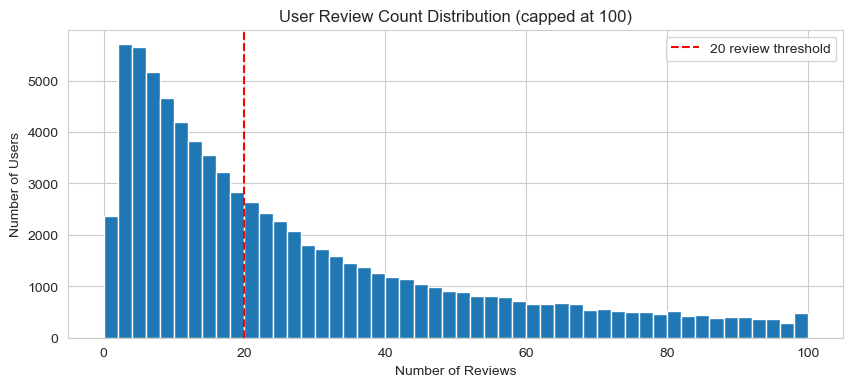


Top 10 reviewers:
           name  review_count  average_stars
17169       Fox         17473           3.77
4723      Bruce         16567           3.67
152         Kim          9941           3.81
3977     Nijole          8363           3.75
17727   Vincent          8354           3.87
7394     George          7738           3.49
10873   Kenneth          6766           3.32
1229   Jennifer          6679           3.34
2455      Sunil          6459           3.53
569        Eric          5887           3.94


In [5]:
# Analyze review counts
print("=== USER REVIEW COUNT ANALYSIS ===\n")
print(df_users['review_count'].describe())

# How many users have 20+ reviews?
users_20plus = df_users[df_users['review_count'] >= 20]
print(f"\nUsers with 20+ reviews: {len(users_20plus):,} ({len(users_20plus)/len(df_users)*100:.1f}%)")

# Plot distribution
plt.figure(figsize=(10, 4))
df_users[df_users['review_count'] <= 100]['review_count'].hist(bins=50)
plt.title('User Review Count Distribution (capped at 100)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.axvline(x=20, color='r', linestyle='--', label='20 review threshold')
plt.legend()
plt.show()

# Top reviewers
print("\nTop 10 reviewers:")
print(df_users.nlargest(10, 'review_count')[['name', 'review_count', 'average_stars']])

In [6]:
# Load businesses
businesses = []
with open('../data/raw/yelp_academic_dataset_business.json', 'r') as f:
    for i, line in enumerate(f):
        if i >= 100000:
            break
        businesses.append(json.loads(line))

df_businesses = pd.DataFrame(businesses)
print(f"Loaded {len(df_businesses):,} businesses")
print(f"Columns: {df_businesses.columns.tolist()}\n")

# Top cities
print("Top 15 cities by restaurant count:")
print(df_businesses['city'].value_counts().head(15))

Loaded 100,000 businesses
Columns: ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']

Top 15 cities by restaurant count:
city
Philadelphia        9670
Tucson              6166
Tampa               6030
Indianapolis        5003
Nashville           4606
New Orleans         4138
Reno                3968
Edmonton            3356
Saint Louis         3268
Santa Barbara       2539
Boise               1958
Clearwater          1473
Metairie            1101
Saint Petersburg    1094
Sparks              1085
Name: count, dtype: int64


In [7]:
print("=== EDA SUMMARY ===\n")
print(f"✅ Reviews: {len(df_reviews):,} loaded (sample)")
print(f"   - Date range: 2005-2018")
print(f"   - Mostly positive (avg ~4 stars)")
print(f"   - Avg length: 547 characters\n")

print(f"✅ Users: {len(df_users):,} loaded (sample)")
print(f"   - {len(users_20plus):,} users with 20+ reviews (58.8%)")
print(f"   - These will be our 'taste twins'\n")

print(f"✅ Businesses: {len(df_businesses):,} loaded (sample)")
print(f"   - Top cities: Philadelphia, Tucson, Tampa, Indianapolis...")
print(f"   - We'll use these cities in the quiz\n")

print("NEXT STEPS:")
print("1. Upload raw data to S3")
print("2. Process & filter data")
print("3. Build reviewer profiles")
print("4. Create matching algorithm")

=== EDA SUMMARY ===

✅ Reviews: 50,000 loaded (sample)
   - Date range: 2005-2018
   - Mostly positive (avg ~4 stars)
   - Avg length: 547 characters

✅ Users: 100,000 loaded (sample)
   - 58,794 users with 20+ reviews (58.8%)
   - These will be our 'taste twins'

✅ Businesses: 100,000 loaded (sample)
   - Top cities: Philadelphia, Tucson, Tampa, Indianapolis...
   - We'll use these cities in the quiz

NEXT STEPS:
1. Upload raw data to S3
2. Process & filter data
3. Build reviewer profiles
4. Create matching algorithm


In [8]:
# Test different thresholds
thresholds = [10, 15, 20, 25, 30, 50]

print("=== THRESHOLD ANALYSIS ===\n")
for threshold in thresholds:
    qualified = df_users[df_users['review_count'] >= threshold]
    pct = len(qualified)/len(df_users)*100
    print(f"Threshold {threshold:2d}+: {len(qualified):6,} users ({pct:4.1f}%)")

# Recommendation
print("\n💡 RECOMMENDATION:")
print("Threshold 20: Good balance")
print("  - 58,794 users (58.8%) = enough matches")
print("  - 20 reviews = enough to see patterns")
print("  - Not too strict, not too loose")

# Let's also check: if we use threshold 20, how many reviews would we keep?
users_20plus_ids = set(df_users[df_users['review_count'] >= 20]['user_id'])
reviews_from_qualified = df_reviews[df_reviews['user_id'].isin(users_20plus_ids)]
print(f"\n  - Would keep {len(reviews_from_qualified):,} reviews out of {len(df_reviews):,}")
print(f"    ({len(reviews_from_qualified)/len(df_reviews)*100:.1f}%)")

=== THRESHOLD ANALYSIS ===

Threshold 10+: 76,449 users (76.4%)
Threshold 15+: 66,587 users (66.6%)
Threshold 20+: 58,794 users (58.8%)
Threshold 25+: 52,513 users (52.5%)
Threshold 30+: 47,594 users (47.6%)
Threshold 50+: 34,909 users (34.9%)

💡 RECOMMENDATION:
Threshold 20: Good balance
  - 58,794 users (58.8%) = enough matches
  - 20 reviews = enough to see patterns
  - Not too strict, not too loose

  - Would keep 21,211 reviews out of 50,000
    (42.4%)
